In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option("display.max_columns", None)


/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


In [34]:
train_df = pd.read_csv("/kaggle/input/tabular-playground-series-jan-2021/train.csv")
test_df = pd.read_csv("/kaggle/input/tabular-playground-series-jan-2021/test.csv")

In [35]:
train_df.head(10)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
5,9,0.352623,0.258867,0.327373,0.802627,0.284219,0.296886,0.209743,0.273710,0.308018,0.235851,0.278760,0.251406,0.339135,0.293129,7.346874
6,11,0.259096,0.803934,0.580900,0.322884,0.984705,0.378247,0.432821,0.562059,0.290965,0.316543,0.219192,0.326977,0.458653,0.244300,8.616237
7,12,0.481610,0.805446,0.235836,0.365011,0.734725,0.404825,0.465061,0.578794,0.418807,0.451958,0.458720,0.586586,0.321026,0.834694,6.833895
8,13,0.667920,0.776422,0.255154,0.869598,0.678067,0.475274,0.493290,0.638779,0.491023,0.617451,0.413352,0.485558,0.474055,0.608374,8.540793
9,15,0.937751,0.236482,0.216445,0.476463,0.283642,0.456763,0.316416,0.785602,0.695845,0.370941,0.436835,0.826278,0.856748,0.418593,7.701053


In [36]:
test_df.head(10)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275
5,14,0.256414,0.621835,0.959441,0.913052,0.387511,0.314620,0.322014,0.614673,0.292548,0.899578,0.278104,0.274086,0.418178,0.715106
6,16,0.485888,0.359113,0.613006,0.257908,0.283429,0.646103,0.963301,0.311508,0.581260,0.638479,0.840254,0.854393,0.893814,0.269365
7,17,0.673931,0.734818,0.361756,0.567235,0.284732,0.453174,0.515395,0.789382,0.714804,0.265037,0.323776,0.507847,0.539327,0.849788
8,18,0.926054,0.619843,0.356893,0.868551,0.284436,0.865728,0.456673,0.729383,0.739350,0.867766,0.906833,0.963105,0.901933,0.826835
9,19,0.497196,0.619562,0.623283,0.323464,0.503100,0.457458,0.447466,0.612733,0.409860,0.438677,0.330754,0.348405,0.355242,0.259408


So, there are few features and one target variable, of course ID is of not use so first lets get rid of it

In [37]:
train_df = train_df.drop(["id"], axis = 1)
test_df = test_df.drop(["id"], axis = 1)

In [38]:
Summary = pd.DataFrame(train_df.dtypes, columns=["dtype"])
Summary["max"] = train_df.max()
Summary["min"] = train_df.min()
Summary["null"] = train_df.isnull().sum()
Summary["first"] = train_df.iloc[0]
Summary["second"] = train_df.iloc[1]
Summary["third"] = train_df.iloc[2]
Summary

,dtype,max,min,null,first,second,third
cont1,float64,1.016227,-0.082263,0,0.670390,0.388053,0.834950
cont2,float64,0.859697,-0.031397,0,0.811300,0.621104,0.227436
cont3,float64,1.006955,0.020967,0,0.643968,0.686102,0.301584
cont4,float64,1.010402,0.152761,0,0.291791,0.501149,0.293408
cont5,float64,1.034261,0.276377,0,0.284117,0.643790,0.606839
cont6,float64,1.043858,0.066166,0,0.855953,0.449805,0.829175
cont7,float64,1.066167,-0.097666,0,0.890700,0.510824,0.506143
cont8,float64,1.024427,0.217260,0,0.285542,0.580748,0.558771
cont9,float64,1.004114,-0.240604,0,0.558245,0.418335,0.587603
cont10,float64,1.199951,-0.085046,0,0.779418,0.432632,0.823312


In [39]:
len(train_df) #300000

300000

<AxesSubplot:>

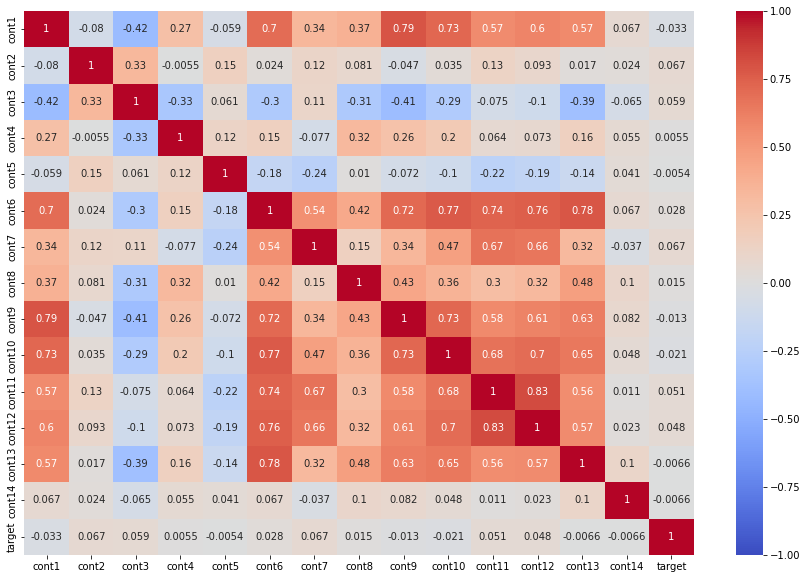

In [40]:

cm = train_df.corr()
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(cm, annot = True, vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', ax = ax)

In [41]:
correlated_features = set()
for i in range(len(cm.columns)):
    for j in range(i):
        if abs(cm.iloc[i, j]) > 0.78:
            colname = cm.columns[i]
            print(colname)
            correlated_features.add(colname)

cont9
cont12
cont13


In [42]:
# # gettig rid of these features
# train_df = train_df.drop(correlated_features, axis = 1)
# test_df = test_df.drop(correlated_features, axis = 1)

There is not much diff in the max value and the min value so I do not think there is a need to scale

In [43]:
y = train_df["target"]
train_df.drop(["target"], axis = 1, inplace = True)

### Adding more features

In [44]:
# train_df["max"] = train_df.max(axis = 1)
# train_df["min"] = train_df.min(axis = 1)
# train_df["skew"] = train_df.skew(axis = 1)
# train_df["mean"] = train_df.mean(axis = 1)
# train_df["median"] = train_df.median(axis = 1)

In [45]:
# test_df["max"] = test_df.max(axis = 1)
# test_df["min"] = test_df.min(axis = 1)
# test_df["skew"] = test_df.skew(axis = 1)
# test_df["mean"] = test_df.mean(axis = 1)
# test_df["median"] = test_df.median(axis = 1)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [47]:
len(train_df)

300000

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.2, random_state = 123)

In [49]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)
# test_df= scaler.transform(test_df)

In [50]:
# lm = LinearRegression()
# lm.fit(X_train, y_train)

In [51]:
# y_pred = lm.predict(X_test)
# loss = mean_squared_error(y_pred, y_test )

In [52]:
# np.sqrt(loss)
# End goal
# Trynna to reduce rmse.
# 0.725037588861915 without doing anything
# with more featues it did help  to a bit 0.7246819980764818
# with scaling 0.7246819980764818, it did not help much 0.7246905107733411
# withe removing correlated features, it did not help, 0.7250850271199127

In [53]:
sub = pd.read_csv("/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv")

In [54]:
# y_res = lm.predict(test_df)

In [55]:
# rr = RandomForestRegressor()
# rr.fit(X_train, y_train)
# y_pred = rr.predict(X_test)

In [56]:
from xgboost import XGBRegressor

In [57]:
# XGB
model = XGBRegressor(objective='reg:squarederror',
                     booster = "gbtree",
                     eval_metric = "rmse",
                     tree_method = "gpu_hist",
                     n_estimators = 1000,
                     learning_rate = 0.04,
                     eta = 0.1,
                     max_depth = 7,
                     subsample=0.85,
                     colsample_bytree = 0.85,
                     colsample_bylevel = 0.8,
                     alpha = 0,
                     random_state = 2021)

In [58]:
# Fit mode
%time model.fit(X_train, y_train)

CPU times: user 7.26 s, sys: 89.8 ms, total: 7.35 s
Wall time: 7.3 s


XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.85, eta=0.1,
             eval_metric='rmse', gamma=0, gpu_id=0, importance_type='gain',
             interaction_constraints='', learning_rate=0.04, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=2,
             num_parallel_tree=1, random_state=2021, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.85, tree_method='gpu_hist',
             validate_parameters=1, verbosity=None)

In [60]:
y_val_pred = model.predict(X_test)
print('Validation Set RMSE:', np.sqrt(mean_squared_error(y_test, y_val_pred)))
# gave the RMSE: 0.6978898866785791
# gave the RMSE without extra features: 0.6973184362827547

Validation Set RMSE: 0.6973184362827547


In [61]:
y_res_xgb = model.predict(test_df)

In [62]:
# loss = mean_squared_error(y_pred, y_test )
# print(np.sqrt(loss))
# # imporvement with evrerything: 0.7067061724711653 but the prvate score of 0.71153 which ain't that bad but it is still bad 
# y_res1 = rr.predict(test_df)

In [63]:
y_res_xgb

array([7.9361506, 7.875067 , 7.987963 , ..., 8.178674 , 8.069324 ,
       7.987083 ], dtype=float32)

In [64]:
sub["target"] = y_res_xgb
sub.to_csv("rc1.csv", index=False)
